In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
sns.set()

In [3]:
raw_data = pd.read_csv('energydata_complete.csv')

In [4]:
raw_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
raw_data.columns.values

array(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7',
       'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'], dtype=object)

In [6]:
data = raw_data[['T2','T6']]

In [7]:
data.head()

,T2,T6
0,19.2,7.026667
1,19.2,6.833333
2,19.2,6.560000
3,19.2,6.433333
4,19.2,6.366667


In [8]:
y = data['T2']
x = data['T6']

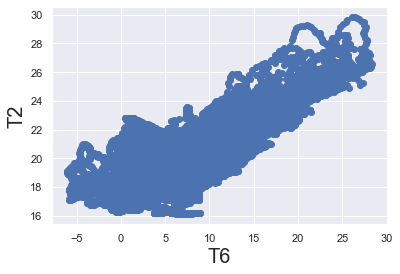

In [9]:
plt.scatter(x,y)
plt.xlabel('T6', fontsize = 20)
plt.ylabel('T2', fontsize = 20)
plt.show()

In [10]:
x.shape

(19735,)

In [11]:
# In order to feed x to sklearn, it should be a 2D array (a matrix)
# Therefore, we must reshape it 
x_matrix = x.values.reshape(-1,1)

In [12]:
x_matrix.shape

(19735, 1)

In [13]:
#We create our linear regression onject
reg = LinearRegression()

In [14]:
#Now, we fit the regression:
reg.fit(x_matrix,y)

LinearRegression()

In [15]:
#To get our R^2, we use the function below:
reg.score(x_matrix,y)

0.6418990830855493

In [16]:
#Our R^2 in two d.p is given below:
r_squared = reg.score(x_matrix,y).round(2)
r_squared

0.64

In [17]:
#As instructed, we drop the 'date' and 'lights' columns:
new_data = raw_data.drop(['date', 'lights'], axis = 1)

In [18]:
new_data.columns.values

array(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8',
       'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'], dtype=object)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
normal_df = pd.DataFrame(scaler.fit_transform(new_data), columns = new_data.columns)
features_df = normal_df.drop(['Appliances'], axis=1)
target_var = normal_df['Appliances']

In [22]:
normal_df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(features_df, target_var, test_size = 0.3, random_state = 42)

In [25]:
reg.fit(x_train, y_train)

LinearRegression()

In [26]:
#we then evaluate our model on the test set:
predicted_values = reg.predict(x_test)

In [27]:
#Now, we check the MAE and round to 2 d.p
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2)

0.05

In [28]:
#Now, we get our RSS:
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2)

45.35

In [29]:
#Now, we get our RMSE:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse,3)

0.088

In [30]:
#Now, we get our coefficient of determination or R^2
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)

0.15

In [31]:
def get_weights_df(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [32]:
linear_weights = get_weights_df(reg, x_train, 'Linear_Model_Weight')

In [33]:
linear_weights

,Features,Linear_Model_Weight
0,RH_2,-0.456698
1,T_out,-0.321860
2,T2,-0.236178
3,T9,-0.189941
4,RH_8,-0.157595
5,RH_out,-0.077671
6,RH_7,-0.044614
7,RH_9,-0.039800
8,T5,-0.015657
9,T1,-0.003281


In [34]:
linear_weights.describe()

,Linear_Model_Weight
count,26.000000
mean,0.000874
std,0.192184
min,-0.456698
25%,-0.043410
50%,0.008579
75%,0.035832
max,0.553547


In [35]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [36]:
ridge_pred_values = ridge_reg.predict(x_test)

In [37]:
rmse = np.sqrt(mean_squared_error(y_test, ridge_pred_values))
round(rmse,3)

0.088

In [50]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [51]:
lasso_pred_values = lasso_reg.predict(x_test)

In [52]:
lasso_weights = get_weights_df(lasso_reg, x_train, 'Lasso_Weight')

In [53]:
lasso_weights

,Features,Lasso_Weight
0,RH_out,-0.049557
1,RH_8,-0.000110
2,T1,0.000000
3,Tdewpoint,0.000000
4,Visibility,0.000000
5,Press_mm_hg,-0.000000
6,T_out,0.000000
7,RH_9,-0.000000
8,T9,-0.000000
9,T8,0.000000


In [54]:
lasso_weights.describe()

,Lasso_Weight
count,26.000000
mean,-0.001111
std,0.010492
min,-0.049557
25%,0.000000
50%,0.000000
75%,0.000000
max,0.017880


In [55]:
lasso_weights.isnull().sum()

Features        0
Lasso_Weight    0
dtype: int64

In [49]:
rmse = np.sqrt(mean_squared_error(y_test, lasso_pred_values))
round(rmse,3)

0.094